In [1]:
# import of my own data-loader
import xmlloader as xl


# import pandas for structuring the data
import pandas as pd

import xml.etree.ElementTree as ET

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

I will start by manually loading in the data

In [2]:
tree = ET.parse('data/ElectricalGRidCoverage/ZimbabweData.xml')
root = tree.getroot()

# We extract the data from the Xml and sort it into a list of data
data_list = []
for record in root.findall('.//record'):
    data_dict = {}
    for field in record.findall('.//field'):
        data_dict[field.get('name')] = field.text if field.text else None
    data_list.append(data_dict)

# We create a dataframe
df = pd.DataFrame(data_list)

# Lastly i just display the dataframe to see if it looks good
df

,Country or Area,Item,Year,Value
0,Zimbabwe,Access to electricity (% of population),1960,None
1,Zimbabwe,Access to electricity (% of population),1961,None
2,Zimbabwe,Access to electricity (% of population),1962,None
3,Zimbabwe,Access to electricity (% of population),1963,None
4,Zimbabwe,Access to electricity (% of population),1964,None
...,...,...,...,...
57,Zimbabwe,Access to electricity (% of population),2017,43.9790649414063
58,Zimbabwe,Access to electricity (% of population),2018,45.4002876281738
59,Zimbabwe,Access to electricity (% of population),2019,46.6820945739746
60,Zimbabwe,Access to electricity (% of population),2020,52.7476674999602


In [3]:
df.shape

(62, 4)

In [4]:
df.head()

,Country or Area,Item,Year,Value
0,Zimbabwe,Access to electricity (% of population),1960,None
1,Zimbabwe,Access to electricity (% of population),1961,None
2,Zimbabwe,Access to electricity (% of population),1962,None
3,Zimbabwe,Access to electricity (% of population),1963,None
4,Zimbabwe,Access to electricity (% of population),1964,None


I first make sure that the table is sorted in a somewhat readable way. Thereafter i drop the key column as it isnt necessary

In [5]:
list(df)

['Country or Area', 'Item', 'Year', 'Value']

In [6]:
df.head(8)



,Country or Area,Item,Year,Value
0,Zimbabwe,Access to electricity (% of population),1960,None
1,Zimbabwe,Access to electricity (% of population),1961,None
2,Zimbabwe,Access to electricity (% of population),1962,None
3,Zimbabwe,Access to electricity (% of population),1963,None
4,Zimbabwe,Access to electricity (% of population),1964,None
5,Zimbabwe,Access to electricity (% of population),1965,None
6,Zimbabwe,Access to electricity (% of population),1966,None
7,Zimbabwe,Access to electricity (% of population),1967,None


We can see that much of the data has "None" which would make graphs discontinue. Therefore we replace these none with 0. This is fine as we will work with graph comparisons later where these zero's tell a better story than "none".

In [7]:
df.isnull().sum()

Country or Area     0
Item                0
Year                0
Value              32
dtype: int64

In [8]:
df.Value.fillna('0', inplace=True)

C:\Users\yusef\AppData\Local\Temp\ipykernel_19540\3442811693.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Value.fillna('0', inplace=True)


In [9]:
df.isnull().sum()

Country or Area    0
Item               0
Year               0
Value              0
dtype: int64

We have now removed any discontinuation and the dataset is now clean.

In [10]:
df.head(-2)

,Country or Area,Item,Year,Value
0,Zimbabwe,Access to electricity (% of population),1960,0
1,Zimbabwe,Access to electricity (% of population),1961,0
2,Zimbabwe,Access to electricity (% of population),1962,0
3,Zimbabwe,Access to electricity (% of population),1963,0
4,Zimbabwe,Access to electricity (% of population),1964,0
5,Zimbabwe,Access to electricity (% of population),1965,0
6,Zimbabwe,Access to electricity (% of population),1966,0
7,Zimbabwe,Access to electricity (% of population),1967,0
8,Zimbabwe,Access to electricity (% of population),1968,0
9,Zimbabwe,Access to electricity (% of population),1969,0


<h4> I have now ensured that all of the empty valuefields have been replaced with 0 </h4>

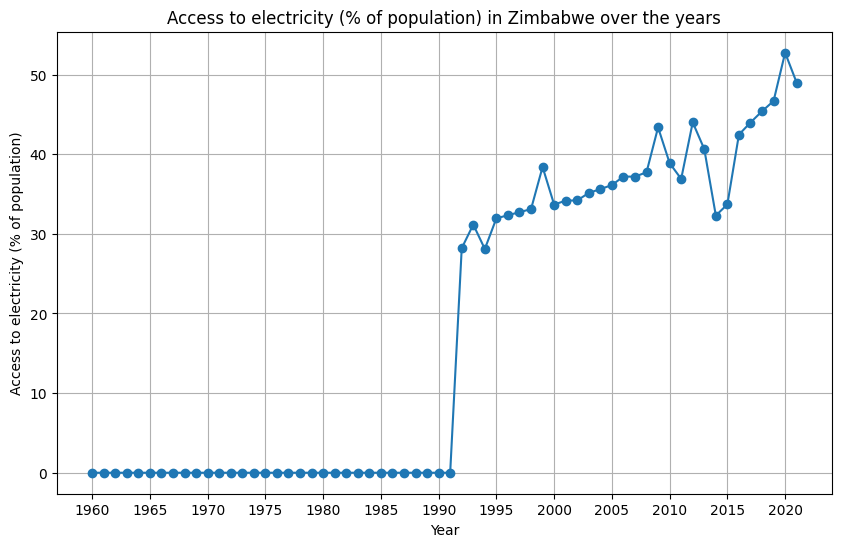

In [11]:

# Converting 'Value' column to numeric since it gave me weird errors before for some reason...
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')



# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Year'],df['Value'], marker='o', linestyle='-')
plt.title('Access to electricity (% of population) in Zimbabwe over the years')
plt.xlabel('Year')
plt.ylabel('Access to electricity (% of population)')
plt.grid(True)

# I want the intervals to be 5 years
plt.xticks(df['Year'][::5])

plt.show()

We now have some data and we can make sense of this as there is a bumpy growth in their use of electricity.
We can from here see when this spark of usage started and how it grow and fell throughout time

Thats cool, but very isolated... Lets try looking at a different place in Africa to see if perhaps not everyone had the same growth-spur? In doing so we will compare the data and perhaps get some history and understanding.

In [12]:
#cdf == counter data frame since i will use this to compare to my main data frame
cdf = xl.XmlLoader.load_counter()

In [13]:
cdf

,Country or Area,Item,Year,Value
0,Comoros,Access to electricity (% of population),1960,None
1,Comoros,Access to electricity (% of population),1961,None
2,Comoros,Access to electricity (% of population),1962,None
3,Comoros,Access to electricity (% of population),1963,None
4,Comoros,Access to electricity (% of population),1964,None
...,...,...,...,...
57,Comoros,Access to electricity (% of population),2017,78.709831237793
58,Comoros,Access to electricity (% of population),2018,81.0197219848633
59,Comoros,Access to electricity (% of population),2019,83.3279495239258
60,Comoros,Access to electricity (% of population),2020,85.6353454589844


We can see that the data has null values on this table, or alternatively like below:

In [14]:
cdf.isnull().sum()

Country or Area     0
Item                0
Year                0
Value              36
dtype: int64

In [15]:
# Lets correct that

cdf.Value.fillna('0', inplace=True)

C:\Users\yusef\AppData\Local\Temp\ipykernel_19540\877673794.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cdf.Value.fillna('0', inplace=True)


In [16]:
cdf.isnull().sum()

Country or Area    0
Item               0
Year               0
Value              0
dtype: int64

Now that we have replaced nullvalues, we can move on to comparing data!

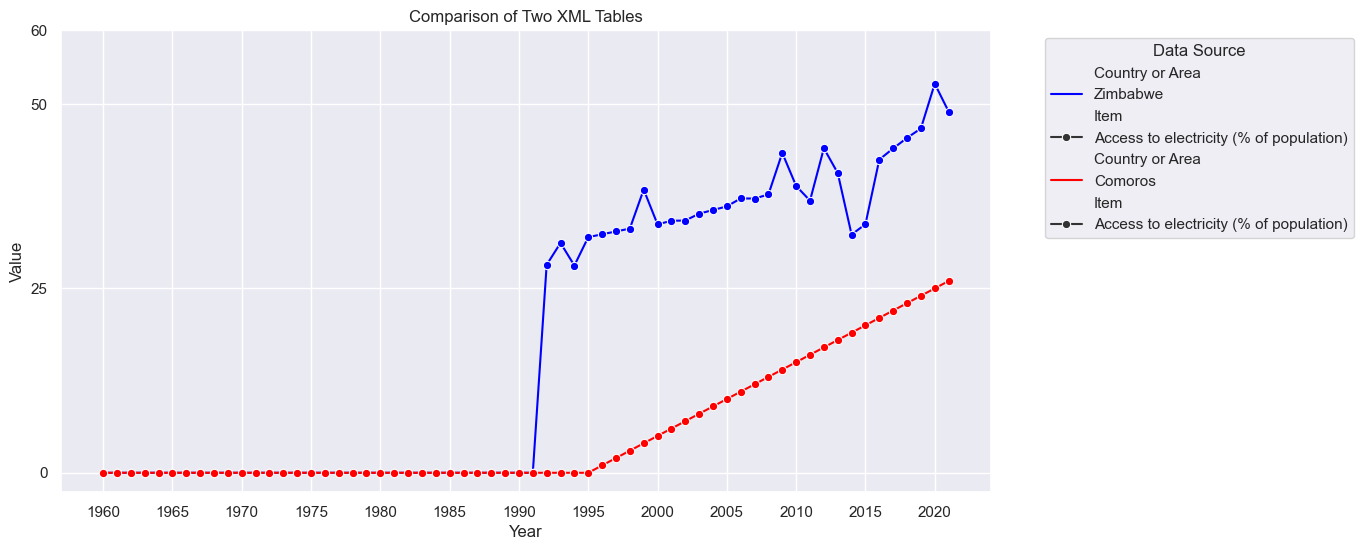

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="darkgrid")

palette = sns.color_palette("husl", n_colors=len(df['Country or Area'].unique()) + len(cdf['Country or Area'].unique()))

plt.figure(figsize=(12, 6))

# This is because i wanted a clear color distinction between the two dataframes
colors = {'Zimbabwe': 'blue', 'Comoros': 'red'}


# The above colors is used here, as we have defined json-like objects with the colors for the two dataframes
sns.lineplot(data=df, x='Year', y='Value', hue='Country or Area', style='Item', markers=True, palette=colors)

# Same here, you can see how we use "palette=colors" to define the colors for the two dataframes
sns.lineplot(data=cdf, x='Year', y='Value', hue='Country or Area', style='Item', markers=True, dashes=True, palette=colors)

#I did this because there were too many numbers otherwise, i could have stopped it at 100 to zoom out and show a sense of scale
plt.yticks([0, 25, 50, 60], ["0", "25", "50", "60"])

plt.title('Comparison of Two XML Tables')
plt.xlabel('Year')
plt.ylabel('Value')

# Show legend (the data on the right)
plt.legend(title='Data Source', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(df['Year'][::5])

# I dont want the graph upsidedown
plt.gca().invert_yaxis()

plt.show()


We can here see how Zimbabwe skyrocketed in access to electricity while Comoros had a more steady application. A lot can be said based on this data, but this is not a history lesson - it is simply to show understanding of application :)